# **Data Pre-processing**

### **Import Libraries**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, silhouette_samples, silhouette_score, adjusted_rand_score, accuracy_score, precision_score, recall_score, f1_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.manifold import TSNE
from sklearn.model_selection import GridSearchCV

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from pandas.plotting import parallel_coordinates
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Circle, Ellipse

import numpy as np
import pandas as pd
import random

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Load Dataset**

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Dataset/train_dataset.zip')
data.head()

,LTE/5g Category,Time,Packet Loss Rate,Packet delay,IoT,LTE/5G,GBR,Non-GBR,AR/VR/Gaming,Healthcare,Industry 4.0,IoT Devices,Public Safety,Smart City & Home,Smart Transportation,Smartphone,slice Type
0,14,0,0.000001,10,1,0,0,1,0,0,0,0,1,0,0,0,3
1,18,20,0.001000,100,0,1,1,0,1,0,0,0,0,0,0,0,1
2,17,14,0.000001,300,0,1,0,1,0,0,0,0,0,0,0,1,1
3,3,17,0.010000,100,0,1,0,1,0,0,0,0,0,0,0,1,1
4,9,4,0.010000,50,1,0,0,1,0,0,0,0,0,1,0,0,2


In [ ]:
data_backup = data
data_backup

,LTE/5g Category,Time,Packet Loss Rate,Packet delay,IoT,LTE/5G,GBR,Non-GBR,AR/VR/Gaming,Healthcare,Industry 4.0,IoT Devices,Public Safety,Smart City & Home,Smart Transportation,Smartphone,slice Type
0,14,0,0.000001,10,1,0,0,1,0,0,0,0,1,0,0,0,3
1,18,20,0.001000,100,0,1,1,0,1,0,0,0,0,0,0,0,1
2,17,14,0.000001,300,0,1,0,1,0,0,0,0,0,0,0,1,1
3,3,17,0.010000,100,0,1,0,1,0,0,0,0,0,0,0,1,1
4,9,4,0.010000,50,1,0,0,1,0,0,0,0,0,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31578,14,23,0.010000,100,0,1,0,1,0,0,0,0,0,0,0,1,1
31579,12,7,0.010000,50,1,0,0,1,0,0,0,0,0,1,0,0,2
31580,18,5,0.010000,300,1,0,1,0,0,0,0,1,0,0,0,0,2
31581,8,1,0.000001,10,1,0,0,1,0,1,0,0,0,0,0,0,3


### **Class Distribution Analysis**

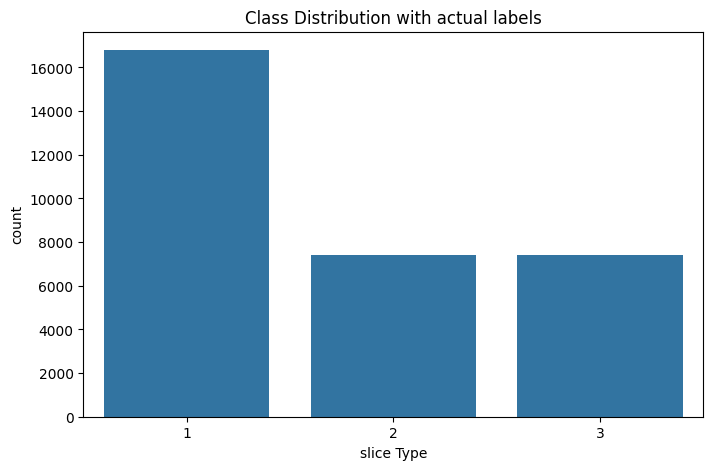

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x=data['slice Type'])
plt.title('Class Distribution with actual labels')
plt.show()

#### **Experiment 8 with undersampling**

In [ ]:
# Identify the majority class
majority_class = data['slice Type'].value_counts().idxmax()

# Count the number of data points in the majority class
majority_count = data['slice Type'].value_counts()[majority_class]

# Count the number of data points in the other two classes
minority_count = data['slice Type'].value_counts().min()

# Calculate the number of data points to remove from the majority class
num_to_remove = majority_count - minority_count

# Randomly select data points from the majority class to remove
majority_indices = data[data['slice Type'] == majority_class].index
remove_indices = np.random.choice(majority_indices, size=num_to_remove, replace=False)
print(remove_indices[:100])

# Remove the selected data points from the DataFrame
balanced_data = data.drop(remove_indices)

[19598  1285  1158 27678 24205 10483  6548 15355  4870  9719 25574 25797
 16890  5837 21156  2664 25286 22646 23314  9231 15928 22958 29046  4045
 16980  5701 15643  3006  1476 24691 15526 11852 29647  4864 23951 11293
 19819 15395 14836 27798 22730 15200 16988 17038 30079  5104 23628  8196
 21328 23189  7669 30689 28342    92  3007 23612 23340  8452 16482 17221
  8840 22260  2399 29854 19936 19210  2748 21503  5984  6355 21002  1634
 23146 19123 10143 22777   960 24872  2537  5491 21773 10654  3661  8152
   990 28302 27050  8856 12318 29678  9081 26377 20365 24933 30766 10253
  5185 11374 13836   195]


In [ ]:
data = balanced_data
data.head()

,LTE/5g Category,Time,Packet Loss Rate,Packet delay,IoT,LTE/5G,GBR,Non-GBR,AR/VR/Gaming,Healthcare,Industry 4.0,IoT Devices,Public Safety,Smart City & Home,Smart Transportation,Smartphone,slice Type
0,14,0,0.000001,10,1,0,0,1,0,0,0,0,1,0,0,0,3
4,9,4,0.010000,50,1,0,0,1,0,0,0,0,0,1,0,0,2
5,19,2,0.000001,10,1,0,0,1,0,0,1,0,0,0,0,0,3
6,15,2,0.010000,300,1,0,1,0,0,0,0,1,0,0,0,0,2
8,8,20,0.001000,150,0,1,0,1,0,0,0,0,0,0,0,1,1


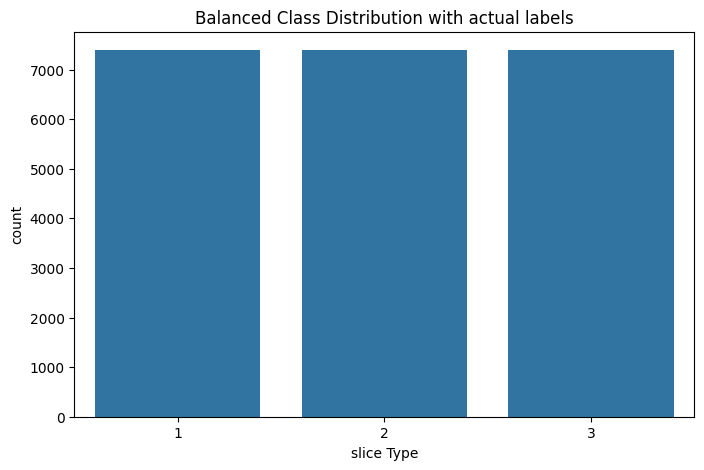

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x=data['slice Type'])
plt.title('Balanced Class Distribution with actual labels')
plt.show()

### **Relevant Feature Selection**

In [ ]:
# Select relevant features for clustering (excluding LTE/5g Category and Time)
# X = data.drop(['LTE/5g Category', 'Time'], axis=1)
# features = ['Packet Loss Rate', 'Packet delay', 'IoT',	'LTE/5G',	'GBR',	'Non-GBR', 'AR/VR/Gaming',	'Healthcare',	'Industry 4.0', 'IoT Devices',	'Public Safety',	'Smart City & Home',	'Smart Transportation',	'Smartphone']
features = ['Packet Loss Rate', 'Packet delay', 'IoT',	'LTE/5G',	'GBR',	'Non-GBR']
# features = ['Packet Loss Rate', 'IoT',	'LTE/5G',	'GBR',	'Non-GBR']
# features = ['Packet Loss Rate', 'Packet delay']
# features = ['Packet Loss Rate']

### **Define X and y**

In [ ]:
X = data[features]
X

,Packet Loss Rate,Packet delay,IoT,LTE/5G,GBR,Non-GBR
0,0.000001,10,1,0,0,1
4,0.010000,50,1,0,0,1
5,0.000001,10,1,0,0,1
6,0.010000,300,1,0,1,0
8,0.001000,150,0,1,0,1
...,...,...,...,...,...,...
31578,0.010000,100,0,1,0,1
31579,0.010000,50,1,0,0,1
31580,0.010000,300,1,0,1,0
31581,0.000001,10,1,0,0,1


In [ ]:
y = data['slice Type']

### **Apply t-sne to X**

In [ ]:
X_backup = X
X_backup

,Packet Loss Rate,Packet delay,IoT,LTE/5G,GBR,Non-GBR
0,0.000001,10,1,0,0,1
4,0.010000,50,1,0,0,1
5,0.000001,10,1,0,0,1
6,0.010000,300,1,0,1,0
8,0.001000,150,0,1,0,1
...,...,...,...,...,...,...
31578,0.010000,100,0,1,0,1
31579,0.010000,50,1,0,0,1
31580,0.010000,300,1,0,1,0
31581,0.000001,10,1,0,0,1


In [ ]:
tsne = TSNE(n_components=2, random_state=42)  # Reduce to 2 dimensions
X_tsne = tsne.fit_transform(X)
X_tsne

array([[-115.68005  ,    3.1211724],
       [ -64.88643  , -175.68619  ],
       [-115.68005  ,    3.1211724],
       ...,
       [ 151.76506  ,  -81.2752   ],
       [-115.68005  ,    3.1211724],
       [-115.68005  ,    3.1211724]], dtype=float32)

In [ ]:
X = pd.DataFrame({'Feature1': X_tsne[:, 0], 'Feature2': X_tsne[:, 1]})
X

,Feature1,Feature2
0,-115.680054,3.121172
1,-64.886429,-175.686188
2,-115.680054,3.121172
3,151.765060,-81.275200
4,124.478523,47.506931
...,...,...
22171,61.450996,-202.640762
22172,-64.886429,-175.686188
22173,151.765060,-81.275200
22174,-115.680054,3.121172


In [ ]:
data = pd.DataFrame({'Feature1': X_tsne[:, 0], 'Feature2': X_tsne[:, 1], 'slice Type': y})
data

,Feature1,Feature2,slice Type
0,-115.680054,3.121172,3
4,-64.886429,-175.686188,2
5,-115.680054,3.121172,3
6,151.765060,-81.275200,2
8,124.478523,47.506931,1
...,...,...,...
31578,61.450996,-202.640762,1
31579,-64.886429,-175.686188,2
31580,151.765060,-81.275200,2
31581,-115.680054,3.121172,3


In [ ]:
features = ['Feature1', 'Feature2']

### **Ground Truth Calculation**

#### **Ground Truth Slice 1**

In [ ]:
# Group data by label "slice 1"
grouped_data_slice1 = data[data['slice Type'] == 1]
grouped_data_slice1

,Feature1,Feature2,slice Type
8,124.478523,47.506931,1
9,124.478523,47.506931,1
10,222.772202,54.667751,1
13,159.008484,145.785294,1
14,38.542477,90.008293,1
...,...,...,...
31571,124.478523,47.506931,1
31573,38.542477,90.008293,1
31574,159.008484,145.785294,1
31575,-22.600266,232.334900,1


In [ ]:
# Create 14-dimensional vectors
grouped_data_slice1_vec = grouped_data_slice1[features].values
grouped_data_slice1_vec

array([[ 124.47852 ,   47.50693 ],
       [ 124.47852 ,   47.50693 ],
       [ 222.7722  ,   54.66775 ],
       ...,
       [ 159.00848 ,  145.7853  ],
       [ -22.600266,  232.3349  ],
       [  61.450996, -202.64076 ]], dtype=float32)

In [ ]:
# Calculate Average
GT_slice1 = np.mean(grouped_data_slice1_vec, axis=0)
GT_slice1

array([51.743  , 96.98628], dtype=float32)

#### **Ground Truth Slice 2**

In [ ]:
# Group data by label "slice 2"
grouped_data_slice2 = data[data['slice Type'] == 2]
grouped_data_slice2

,Feature1,Feature2,slice Type
4,-64.886429,-175.686188,2
6,151.765060,-81.275200,2
12,-64.886429,-175.686188,2
26,-64.886429,-175.686188,2
42,24.325678,-60.279240,2
...,...,...,...
31562,-64.886429,-175.686188,2
31567,151.765060,-81.275200,2
31576,-64.886429,-175.686188,2
31579,-64.886429,-175.686188,2


In [ ]:
# Create 14-dimensional vectors
grouped_data_slice2_vec = grouped_data_slice2[features].values
grouped_data_slice2_vec

array([[ -64.88643, -175.68619],
       [ 151.76506,  -81.2752 ],
       [ -64.88643, -175.68619],
       ...,
       [ -64.88643, -175.68619],
       [ -64.88643, -175.68619],
       [ 151.76506,  -81.2752 ]], dtype=float32)

In [ ]:
# Calculate Average
GT_slice2 = np.mean(grouped_data_slice2_vec, axis=0)
GT_slice2

array([  64.838936, -100.04334 ], dtype=float32)

#### **Ground Truth Slice 3**

In [ ]:
# Group data by label "slice 3"
grouped_data_slice3 = data[data['slice Type'] == 3]
grouped_data_slice3

,Feature1,Feature2,slice Type
0,-115.680054,3.121172,3
5,-115.680054,3.121172,3
11,-115.680054,3.121172,3
17,-115.680054,3.121172,3
18,-115.680054,3.121172,3
...,...,...,...
31553,-115.680054,3.121172,3
31570,-115.680054,3.121172,3
31572,-115.680054,3.121172,3
31581,-115.680054,3.121172,3


In [ ]:
# Create 14-dimensional vectors
grouped_data_slice3_vec = grouped_data_slice3[features].values
grouped_data_slice3_vec

array([[-115.68005  ,    3.1211724],
       [-115.68005  ,    3.1211724],
       [-115.68005  ,    3.1211724],
       ...,
       [-115.68005  ,    3.1211724],
       [-115.68005  ,    3.1211724],
       [-115.68005  ,    3.1211724]], dtype=float32)

In [ ]:
# Calculate Average
GT_slice3 = np.mean(grouped_data_slice3_vec, axis=0)
GT_slice3

array([-115.68006  ,    3.1211724], dtype=float32)

#### **Plot Ground Truth**

In [ ]:
# Combine the centroids into a single array
GT_centroids = np.vstack((GT_slice1, GT_slice2, GT_slice3))
GT_centroids

array([[  51.743    ,   96.98628  ],
       [  64.838936 , -100.04334  ],
       [-115.68006  ,    3.1211724]], dtype=float32)

In [ ]:
# # Apply PCA to reduce the dimensionality to 3 dimensions
# pca = PCA(n_components=3)
# centroids_3d = pca.fit_transform(GT_centroids)
# centroids_3d

In [ ]:
# # Plot the centroids in 3D space
# fig = plt.figure(figsize=(14, 8))
# ax = fig.add_subplot(111, projection='3d')

# ax.scatter(centroids_3d[:, 0], centroids_3d[:, 1], centroids_3d[:, 2], c='r', marker='o')

# ax.set_xlabel('Principal Component 1')
# ax.set_ylabel('Principal Component 2')
# ax.set_zlabel('Principal Component 3')

# plt.title('Ground Truth Centroids (3D)')
# plt.show()

### **Datasplit - X, X_train and X_test**

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=42)
X_train

,Feature1,Feature2
410,151.765060,-81.275200
11597,-115.680054,3.121172
14679,-115.680054,3.121172
4653,-115.680054,3.121172
2189,-115.680054,3.121172
...,...,...
11964,38.542477,90.008293
21575,-115.680054,3.121172
5390,-115.680054,3.121172
860,-115.680054,3.121172


In [ ]:
X_test

,Feature1,Feature2
15118,24.325678,-60.279240
14240,-115.680054,3.121172
11096,-64.886429,-175.686188
2458,-64.886429,-175.686188
20371,151.765060,-81.275200
...,...,...
19701,-115.680054,3.121172
14884,151.765060,-81.275200
17263,-115.680054,3.121172
21816,-146.540512,172.539825


In [ ]:
y_train

608      2
16611    3
20975    3
6723     3
3173     3
        ..
17150    1
30751    3
7794     3
1250     3
22552    1
Name: slice Type, Length: 19958, dtype: int64

In [ ]:
y_test

21585    2
20352    3
15883    2
3575     2
29020    2
        ..
28084    3
21256    2
24657    3
31093    1
29632    1
Name: slice Type, Length: 2218, dtype: int64

# **EDA**

## Pair Plots

In [ ]:
# sns.pairplot(X)
# plt.suptitle('Pairwise Scatter Plots', y=1.02)
# plt.show()

In [ ]:
# sns.pairplot(X_tsne)
# plt.suptitle('Pairwise Scatter Plots', y=1.02)
# plt.show()

## Heatmaps

In [ ]:
# # Create a heatmap for the correlation matrix of all features
# plt.figure(figsize=(14, 8))
# sns.heatmap(X_train.corr(), annot=True, annot_kws={"size": 8})
# plt.title('Heatmap (Feature Distribution)')
# plt.show()

# **Data Modelling and Analysis**

## **Model Training**

In [ ]:
# Create a KMeans model
kmeans_model = KMeans(n_clusters=3, random_state=42)

# Fit the model to the training data
best_model = kmeans_model.fit(X_train)
best_model

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

## **Hyperparameter Tuning**

In [ ]:
# # Initialize KMeans model
# kmeans = KMeans()

# # Define hyperparameters to tune
# param_grid = {
#     'init': ['k-means++', 'random'],
#     'n_clusters': [3],
#     'max_iter': [50, 100, 200, 300],
#     # 'tol': [1e-2, 1e-3, 1e-4, 1e-5, 1e-6],
#     # 'tol': [1e-6],
#     'algorithm': ['auto', 'full'],
#     # 'n_jobs': [-1],  # Use all available CPU cores
#     'random_state': [42]
# }

# # Perform GridSearchCV for hyperparameter tuning
# grid_search = GridSearchCV(kmeans, param_grid, cv=10, scoring='neg_mean_squared_error')
# grid_search.fit(X_train)

# # Get best hyperparameters and model
# best_params = grid_search.best_params_
# best_model = grid_search.best_estimator_

# # Print best hyperparameters
# print("\n\nBest Hyperparameters:")
# print(best_params)

# # Print best model
# print("\nBest Model:")
# best_model

## **Model Labels**

In [ ]:
kmeans_model_labels = best_model.labels_
kmeans_model_labels

array([0, 2, 2, ..., 2, 2, 1], dtype=int32)

In [ ]:
kmeans_model_labels_aligned = kmeans_model_labels + 1
kmeans_model_labels_aligned

array([1, 3, 3, ..., 3, 3, 2], dtype=int32)

In [ ]:
len(kmeans_model_labels_aligned)

19958

In [ ]:
np.unique(kmeans_model_labels_aligned)

array([1, 2, 3], dtype=int32)

## **Model Centroids**

In [ ]:
kmeans_model_centroids = best_model.cluster_centers_
kmeans_model_centroids

array([[  65.15136 , -109.2033  ],
       [  75.02162 ,  125.09816 ],
       [-118.50548 ,   18.611408]], dtype=float32)

In [ ]:
C1 = kmeans_model_centroids[0]
C1

array([  65.15136, -109.2033 ], dtype=float32)

In [ ]:
C2 = kmeans_model_centroids[1]
C2

array([ 75.02162, 125.09816], dtype=float32)

In [ ]:
C3 = kmeans_model_centroids[2]
C3

array([-118.50548 ,   18.611408], dtype=float32)

In [ ]:
arr = np.array([[0.0, 0.0], [0.0, 0.0], [0.0, 0.0]]).astype(np.float32)
arr
arr.dtype

dtype('float32')

## **Minimum Distance of C1 from Ground Truths**

In [ ]:
dist_C1_GT_slice1 = np.linalg.norm(C1 - GT_slice1)
dist_C1_GT_slice1

206.62509

In [ ]:
dist_C1_GT_slice2 = np.linalg.norm(C1 - GT_slice2)
dist_C1_GT_slice2

9.165284

In [ ]:
dist_C1_GT_slice3 = np.linalg.norm(C1 - GT_slice3)
dist_C1_GT_slice3

212.87741

In [ ]:
# Determine the closest centroid
min_dist_C1 = min(dist_C1_GT_slice1, dist_C1_GT_slice2, dist_C1_GT_slice3)

if min_dist_C1 == dist_C1_GT_slice1:
    closest_centroid_C1 = "Slice 1"
    arr[0] = C1
elif min_dist_C1 == dist_C1_GT_slice2:
    closest_centroid_C1 = "Slice 2"
    arr[0] = C2
else:
    closest_centroid_C1 = "Slice 3"
    arr[0] = C3

print("C1 has minimum distance of ", min_dist_C1, "from the Model's Centroid/Cluster", closest_centroid_C1)
arr

C1 has minimum distance of  9.165284 from the Model's Centroid/Cluster Slice 2


array([[ 75.02162, 125.09816],
       [  0.     ,   0.     ],
       [  0.     ,   0.     ]], dtype=float32)

## **Minimum Distance of C2 from Ground Truths**

In [ ]:
dist_C2_GT_slice1 = np.linalg.norm(C2 - GT_slice1)
dist_C2_GT_slice1

36.498928

In [ ]:
dist_C2_GT_slice2 = np.linalg.norm(C2 - GT_slice2)
dist_C2_GT_slice2

225.37166

In [ ]:
dist_C2_GT_slice3 = np.linalg.norm(C2 - GT_slice3)
dist_C2_GT_slice3

226.37474

In [ ]:
# Determine the closest centroid
min_dist_C2 = min(dist_C2_GT_slice1, dist_C2_GT_slice2, dist_C2_GT_slice3)

if min_dist_C2 == dist_C2_GT_slice1:
    closest_centroid_C2 = "Slice 1"
    arr[1] = C1
elif min_dist_C2 == dist_C2_GT_slice2:
    closest_centroid_C2 = "Slice 2"
    arr[1] = C2
else:
    closest_centroid_C2 = "Slice 3"
    arr[1] = C3

print("C2 has minimum distance of ", min_dist_C2, "from the Model's Centroid/Cluster", closest_centroid_C2)
arr

C2 has minimum distance of  36.498928 from the Model's Centroid/Cluster Slice 1


array([[  75.02162,  125.09816],
       [  65.15136, -109.2033 ],
       [   0.     ,    0.     ]], dtype=float32)

## **Minimum Distance of C3 from Ground Truths**

In [ ]:
dist_C3_GT_slice1 = np.linalg.norm(C3 - GT_slice1)
dist_C3_GT_slice1

187.42242

In [ ]:
dist_C3_GT_slice2 = np.linalg.norm(C3 - GT_slice2)
dist_C3_GT_slice2

218.38985

In [ ]:
dist_C3_GT_slice3 = np.linalg.norm(C3 - GT_slice3)
dist_C3_GT_slice3

15.745806

In [ ]:
# Determine the closest centroid
min_dist_C3 = min(dist_C3_GT_slice1, dist_C3_GT_slice2, dist_C3_GT_slice3)

if min_dist_C3 == dist_C3_GT_slice1:
    closest_centroid_C3 = "Slice 1"
    arr[2] = C1
elif min_dist_C3 == dist_C3_GT_slice2:
    closest_centroid_C3 = "Slice 2"
    arr[2] = C2
else:
    closest_centroid_C3 = "Slice 3"
    arr[2] = C3

print("C3 has minimum distance of ", min_dist_C3, "from the Model's Centroid/Cluster", closest_centroid_C3)
arr

C3 has minimum distance of  15.745806 from the Model's Centroid/Cluster Slice 3


array([[  75.02162 ,  125.09816 ],
       [  65.15136 , -109.2033  ],
       [-118.50548 ,   18.611408]], dtype=float32)

## **Model Centroids Mapping to Labels**

In [ ]:
print("C1 has minimum distance of ", min_dist_C1, "from the Model's Centroid/Cluster", closest_centroid_C1)
print("C2 has minimum distance of ", min_dist_C2, "from the Model's Centroid/Cluster", closest_centroid_C2)
print("C3 has minimum distance of ", min_dist_C3, "from the Model's Centroid/Cluster", closest_centroid_C3)

C1 has minimum distance of  9.165284 from the Model's Centroid/Cluster Slice 2
C2 has minimum distance of  36.498928 from the Model's Centroid/Cluster Slice 1
C3 has minimum distance of  15.745806 from the Model's Centroid/Cluster Slice 3


In [ ]:
kmeans_model

KMeans(n_clusters=3, random_state=42)

In [ ]:
kmeans_model_mod = kmeans_model
kmeans_model_mod

KMeans(n_clusters=3, random_state=42)

In [ ]:
kmeans_model_mod.cluster_centers_ = arr

In [ ]:
kmeans_model_centroids_mapped = kmeans_model_mod.cluster_centers_
kmeans_model_centroids_mapped

array([[  75.02162 ,  125.09816 ],
       [  65.15136 , -109.2033  ],
       [-118.50548 ,   18.611408]], dtype=float32)

## **Model Testing**

In [ ]:
# Predict the labels for the test data
# y_pred = kmeans_model.predict(X_test)
y_pred = kmeans_model_mod.predict(X_test)
y_pred

array([1, 2, 1, ..., 2, 2, 0], dtype=int32)

In [ ]:
y_pred_aligned = y_pred + 1
y_pred_aligned

array([2, 3, 2, ..., 3, 3, 1], dtype=int32)

In [ ]:
len(y_pred_aligned)

2218

In [ ]:
np.unique(y_pred_aligned)

array([1, 2, 3], dtype=int32)

## **Update testing dataset with labels**

In [ ]:
# Get the column names from the original DataFrame
X_test_column_names = X_test.columns.tolist()

# Convert X_test to a pandas DataFrame
# X_test_df = pd.DataFrame(X_test, columns=X_test_column_names)

# Create a copy to avoid modifying the original DataFrame
X_test_with_labels = X_test.copy()

# Resetting indices to avoid alignment issues
X_test_with_labels.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
# y_pred.reset_index(drop=True, inplace=True)

actual_label = pd.Series(y_test, name='actual_label')
predicted_label = pd.Series(y_pred_aligned, name='predicted_label')

# Include the 'predicted labels' as a new column in the DataFrame
X_test_with_labels['actual_label'] = actual_label

# Include the 'predicted labels' as a new column in the DataFrame
X_test_with_labels['predicted_label'] = predicted_label

In [ ]:
# Display the Updated Table
X_test_with_labels[:20]

,Feature1,Feature2,actual_label,predicted_label
0,24.325678,-60.279240,2,2
1,-115.680054,3.121172,3,3
2,-64.886429,-175.686188,2,2
3,-64.886429,-175.686188,2,2
4,151.765060,-81.275200,2,2
5,38.542477,90.008293,1,1
6,-115.680054,3.121172,3,3
7,151.765060,-81.275200,2,2
8,-115.680054,3.121172,3,3
9,-115.680054,3.121172,3,3


## **Predicted Label Analysis**

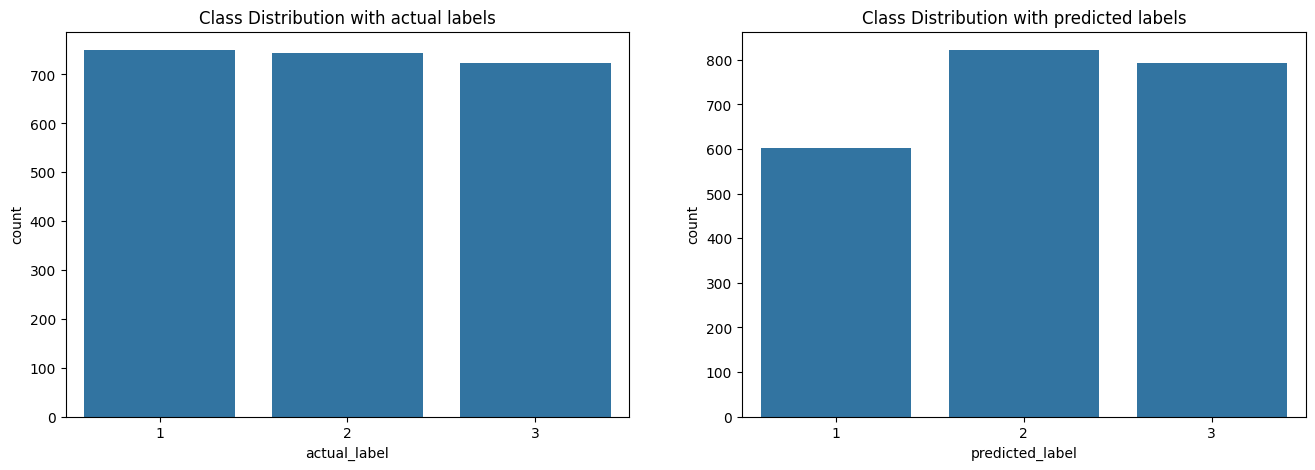

In [ ]:
# Class Distribution

fig, axs = plt.subplots(1, 2, figsize=(16, 5))

sns.countplot(x=actual_label, ax=axs[0])
axs[0].set_title('Class Distribution with actual labels')

sns.countplot(x=predicted_label, ax=axs[1])
axs[1].set_title('Class Distribution with predicted labels')

plt.show()

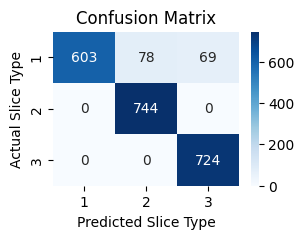

In [ ]:
# Confusion Matrix
plt.figure(figsize=(3, 2))
cm = confusion_matrix(actual_label, predicted_label)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(actual_label), yticklabels=np.unique(predicted_label))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Slice Type')
plt.ylabel('Actual Slice Type')
plt.show()

In [ ]:
# Calculate accuracy
print("Accuracy", accuracy_score(actual_label, predicted_label))

# Calculate precision
print("Precision", precision_score(actual_label, predicted_label, average='weighted'))

# Calculate recall
print("Recall", recall_score(actual_label, predicted_label, average='weighted'))

# Calculate F1-score
print("F1-score", f1_score(actual_label, predicted_label, average='weighted'))

Accuracy 0.9337240757439135
Precision 0.9397679183751841
Recall 0.9337240757439135
F1-score 0.9317070138455834


In [ ]:
conf_matrix = cm
conf_matrix

array([[603,  78,  69],
       [  0, 744,   0],
       [  0,   0, 724]])

In [ ]:
# True Positives (TP) for each class
TP_class0 = conf_matrix[0, 0]
TP_class1 = conf_matrix[1, 1]
TP_class2 = conf_matrix[2, 2]

# False Positives (FP) for each class
FP_class0 = np.sum(conf_matrix[0, :]) - TP_class0
FP_class1 = np.sum(conf_matrix[1, :]) - TP_class1
FP_class2 = np.sum(conf_matrix[2, :]) - TP_class2

# False Negatives (FN) for each class
FN_class0 = np.sum(conf_matrix[:, 0]) - TP_class0
FN_class1 = np.sum(conf_matrix[:, 1]) - TP_class1
FN_class2 = np.sum(conf_matrix[:, 2]) - TP_class2

# True Negatives (TN) for each class
TN_class0 = np.sum(conf_matrix) - TP_class0 - FP_class0 - FN_class0
TN_class1 = np.sum(conf_matrix) - TP_class1 - FP_class1 - FN_class1
TN_class2 = np.sum(conf_matrix) - TP_class2 - FP_class2 - FN_class2

# Overall True Positives (TP), True Negatives (TN), False Positives (FP), False Negatives (FN)
TP = TP_class0 + TP_class1 + TP_class2
FP = FP_class0 + FP_class1 + FP_class2
FN = FN_class0 + FN_class1 + FN_class2
TN = TN_class0 + TN_class1 + TN_class2

# Display the values
print("True Positives (TP):", TP)
print("False Positives (FP):", FP)
print("False Negatives (FN):", FN)
print("True Negatives (TN):", TN)

True Positives (TP): 2071
False Positives (FP): 147
False Negatives (FN): 147
True Negatives (TN): 4289


In [ ]:
acc = (TP + TN)/(TP + TN + FP + FN)
acc

0.9558160504959423

In [ ]:
pres = TP/(TP + FP)
pres

0.9337240757439135

In [ ]:
rec = TP/(TP + FN)
rec

0.9337240757439135

In [ ]:
f1 = 2 * ((pres * rec)/(pres + rec))
f1

0.9337240757439135